In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as py

In [2]:
train = pd.read_csv("C:/Machine Learning/Hackathons\Kaggle/Santander Customer Transaction Prediction/train.csv")
test = pd.read_csv("C:/Machine Learning/Hackathons\Kaggle/Santander Customer Transaction Prediction/test.csv")

In [3]:
train.shape, test.shape

((200000, 202), (200000, 201))

In [4]:
train.head(10)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
5,train_5,0,11.4763,-2.3182,12.6080,8.6264,10.9621,3.5609,4.5322,15.2255,...,-6.3068,6.6025,5.2912,0.4403,14.9452,1.0314,-3.6241,9.7670,12.5809,-4.7602
6,train_6,0,11.8091,-0.0832,9.3494,4.2916,11.1355,-8.0198,6.1961,12.0771,...,8.7830,6.4521,3.5325,0.1777,18.3314,0.5845,9.1104,9.1143,10.8869,-3.2097
7,train_7,0,13.5580,-7.9881,13.8776,7.5985,8.6543,0.8310,5.6890,22.3262,...,13.1700,6.5491,3.9906,5.8061,23.1407,-0.3776,4.2178,9.4237,8.6624,3.4806
8,train_8,0,16.1071,2.4426,13.9307,5.6327,8.8014,6.1630,4.4514,10.1854,...,1.4298,14.7510,1.6395,1.4181,14.8370,-1.9940,-1.0733,8.1975,19.5114,4.8453
9,train_9,0,12.5088,1.9743,8.8960,5.4508,13.6043,-16.2859,6.0637,16.8410,...,0.5543,6.3160,1.0371,3.6885,14.8344,0.4467,14.1287,7.9133,16.2375,14.2514


In [5]:
train.loc[:,"var_0":"var_199"].loc[1:10]

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
1,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
5,11.4763,-2.3182,12.6080,8.6264,10.9621,3.5609,4.5322,15.2255,3.5855,5.9790,...,-6.3068,6.6025,5.2912,0.4403,14.9452,1.0314,-3.6241,9.7670,12.5809,-4.7602
6,11.8091,-0.0832,9.3494,4.2916,11.1355,-8.0198,6.1961,12.0771,-4.3781,7.9232,...,8.7830,6.4521,3.5325,0.1777,18.3314,0.5845,9.1104,9.1143,10.8869,-3.2097
7,13.5580,-7.9881,13.8776,7.5985,8.6543,0.8310,5.6890,22.3262,5.0647,7.1971,...,13.1700,6.5491,3.9906,5.8061,23.1407,-0.3776,4.2178,9.4237,8.6624,3.4806
8,16.1071,2.4426,13.9307,5.6327,8.8014,6.1630,4.4514,10.1854,-3.1882,9.0827,...,1.4298,14.7510,1.6395,1.4181,14.8370,-1.9940,-1.0733,8.1975,19.5114,4.8453
9,12.5088,1.9743,8.8960,5.4508,13.6043,-16.2859,6.0637,16.8410,0.1287,7.9682,...,0.5543,6.3160,1.0371,3.6885,14.8344,0.4467,14.1287,7.9133,16.2375,14.2514
10,5.0702,-0.5447,9.5900,4.2987,12.3910,-18.8687,6.0382,14.3797,-0.4711,7.3198,...,7.2780,8.0819,0.2139,-0.0761,14.9585,-1.2160,6.6576,9.2553,14.2914,-7.6652


In [6]:
train.groupby(["target"]).count()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
target,,,,,,,,,,,,,,,,,,,,,
0,179902,179902,179902,179902,179902,179902,179902,179902,179902,179902,...,179902,179902,179902,179902,179902,179902,179902,179902,179902,179902
1,20098,20098,20098,20098,20098,20098,20098,20098,20098,20098,...,20098,20098,20098,20098,20098,20098,20098,20098,20098,20098


In [ ]:
test.head(10)

In [7]:
train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


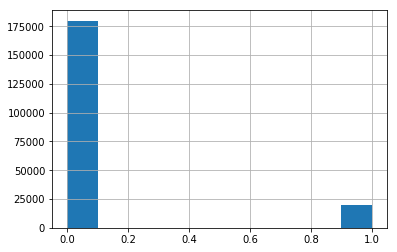

In [12]:
train.target.hist()

In [11]:
train.dtypes

ID_code     object
target       int64
var_0      float64
var_1      float64
var_2      float64
var_3      float64
var_4      float64
var_5      float64
var_6      float64
var_7      float64
var_8      float64
var_9      float64
var_10     float64
var_11     float64
var_12     float64
var_13     float64
var_14     float64
var_15     float64
var_16     float64
var_17     float64
var_18     float64
var_19     float64
var_20     float64
var_21     float64
var_22     float64
var_23     float64
var_24     float64
var_25     float64
var_26     float64
var_27     float64
            ...   
var_170    float64
var_171    float64
var_172    float64
var_173    float64
var_174    float64
var_175    float64
var_176    float64
var_177    float64
var_178    float64
var_179    float64
var_180    float64
var_181    float64
var_182    float64
var_183    float64
var_184    float64
var_185    float64
var_186    float64
var_187    float64
var_188    float64
var_189    float64
var_190    float64
var_191    f

In [ ]:
corr = train.corr()

In [ ]:
corr["target"]

In [ ]:
train.isnull().sum()

In [ ]:
def missing_count(df,threshold= 0):
    """
    #input: 
        df = dataframe for which we have to calculate the missing counts
        threshold = threshold for the missing count
    #return:
        columns and their missing count percentage"""
    missing  = df.isnull().sum().sort_values(ascending = False)
    return (missing[missing>len(df)*(threshold/100)]/len(df))*100

In [ ]:
missing_count(test)

In [ ]:
train.groupby("target").count()["ID_code"]

In [ ]:
para_GS = {"max_depth": [2,4,6,8,10,12]
        ,"max_features" : ["sqrt", "log2"]
        ,"criterion":["gini","entropy"]
        ,"min_samples_leaf":[2,4,8,16,32]
        #,"max_leaf_nodes":[2,4,8,16,32] 
        ,"class_weight":["balanced"]
        ,"max_leaf_nodes":[2,4,8,16,32]
       }
para_lgbm = {"max_depth": [6,8]
        ,"num_leaves":[16,64,32]
       }
model_Performance =[]
#for train_index , test_index in skf.split(train.loc[:,"var_0":"var_199"], train["target"]):
trainx_outer, testx_outer,trainy_outer, testy_outer = train_test_split(train.loc[:,"var_0":"var_199"],
                                                                       train["target"],test_size=0.30,random_state =10,
                                                                       stratify = train["target"])
model_perf = {}
#trainx_outer, testx_outer = train.loc[:,"var_0":"var_199"].loc[train_index], train.loc[:,"var_0":"var_199"].loc[test_index]
#trainy_outer, testy_outer = train["target"].loc[train_index], train["target"].loc[test_index]
print(trainx_outer.shape, testx_outer.shape, testy_outer.shape, testy_outer.shape)
gs= GridSearchCV(estimator=lgbm, cv=5, param_grid=para_lgbm,n_jobs=4, scoring="roc_auc",return_train_score=True)
print(gs)
gs.fit(trainx_outer,trainy_outer)
pre = gs.predict(testx_outer)
test_score = roc_auc_score(testy_outer,pre)
model_perf.update({"best_estimator_":gs.best_estimator_})
model_perf.update({"best_score_" : gs.best_score_})
model_perf.update({"best_params_" : gs.best_params_})
model_perf.update({"test_score" :   test_score})
#model_perf.update({"gs.cv_results_" : gs.cv_results_})

model_Performance.append(model_perf)

In [ ]:
model_Performance

In [ ]:
para_RS =     {"criterion": ["entropy","gini"],
               #"splitter":["best","random"],
               "max_depth": randint(1,12),
               "min_samples_split":randint(250,425),
               "min_samples_leaf": randint(2, 50),
               #"min_weight_fraction_leaf":[],
               "max_features": ["log2", "sqrt"],
               "class_weight":['balanced'],
               "max_leaf_nodes":randint(10,30),
               "min_impurity_decrease":[0,.01,.001,.2,.7],
               "n_estimators":randint(700,1500)
              }
rf = RandomForestClassifier()
model_Performance =[]
#for train_index , test_index in skf.split(train.loc[:,"var_0":"var_199"], train["target"]):
trainx_outer, testx_outer,trainy_outer, testy_outer = train_test_split(train.loc[:,"var_0":"var_199"],
                                                                       train["target"],test_size=0.30,random_state =10,
                                                                       stratify = train["target"])
model_perf = {}
#trainx_outer, testx_outer = train.loc[:,"var_0":"var_199"].loc[train_index], train.loc[:,"var_0":"var_199"].loc[test_index]
#trainy_outer, testy_outer = train["target"].loc[train_index], train["target"].loc[test_index]
print(trainx_outer.shape, testx_outer.shape, testy_outer.shape, testy_outer.shape)
gs= RandomizedSearchCV(estimator=rf, cv=5, param_distributions=para_RS,
                       n_jobs=4,n_iter =1, scoring="roc_auc",return_train_score=True)
gs.fit(trainx_outer,trainy_outer)
pre = gs.predict(testx_outer)
test_score = roc_auc_score(testy_outer,pre)
model_perf.update({"best_estimator_":gs.best_estimator_})
model_perf.update({"best_score_" : gs.best_score_})
model_perf.update({"best_params_" : gs.best_params_})
model_perf.update({"test_score" :   test_score})
#model_perf.update({"gs.cv_results_" : gs.cv_results_})

model_Performance.append(model_perf)
model_Performance

In [ ]:
from sklearn.utils.class_weight import compute_sample_weight as t
v = t(class_weight="balanced",y=train["target"])
v[1:100]

In [6]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier ,ExtraTreesClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
import lightgbm
import xgboost
rf = RandomForestClassifier()
#from sklearn.preprocessing import 
dt = DecisionTreeClassifier()
et = ExtraTreesClassifier()
dtt = DecisionTreeClassifier()
ab =  AdaBoostClassifier(base_estimator=dtt)
gb= GradientBoostingClassifier()
lr = LogisticRegression()
lgbm = lightgbm.LGBMClassifier()
LDA = LinearDiscriminantAnalysis()
QDA = QuadraticDiscriminantAnalysis()
xgb = xgboost.XGBClassifier(eval_metric = "auc")
from scipy.stats import randint
from scipy.stats import uniform 
import time

In [ ]:
uniform(.1,.5)

In [20]:
trainx_outer, testx_outer,trainy_outer, testy_outer = train_test_split(train.loc[:,"var_0":"var_199"],
                                                                       train["target"],test_size=0.30,random_state =10,
                                                                       stratify = train["target"])
#gbb = GradientBoostingClassifier(n_estimators=40,max_depth=7 )
#gbb  = LogisticRegressionCV(class_weight = "balanced",refit= True, random_state = 96)
#gbb = ExtraTreesClassifier(class_weight='balanced',criterion= 'gini',max_depth= 6,
#                          max_features= 'log2',max_leaf_nodes= 29,min_impurity_decrease= 0
#                          ,min_samples_leaf= 18,min_samples_split= 416,n_estimators= 287)
#gbb = xgboost.XGBClassifier(objective="binary:logistic", random_state=113,eval_metric = "auc")
gbb = LinearDiscriminantAnalysis(shrinkage="auto",solver="lsqr")
#gbb = QuadraticDiscriminantAnalysis()
print(gbb)
tick = time.time()
gbb.fit(trainx_outer,trainy_outer)
tock = time.time()
print(gbb)
pred = gbb.predict(testx_outer)
test_score_rs = roc_auc_score(testy_outer,pred)
total_time =  tock - tick
test_score_rs, total_time

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage='auto',
              solver='lsqr', store_covariance=False, tol=0.0001)
LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage='auto',
              solver='lsqr', store_covariance=False, tol=0.0001)


(0.6331702346590186, 2.275010585784912)

In [13]:
gbb.n_components

In [ ]:
para_GS = {"max_depth": [10,12,14,18,22]
            ,"max_features" : ["sqrt", "log2"]
            ,"criterion":["gini","entropy"]
            ,"min_samples_leaf":[2,4,8,16,32]
            ,"max_leaf_nodes":[2,4,8,16,32] 
            ,"class_weight":["balanced"]
            ,"max_leaf_nodes":[2,4,8,16,32]
           }


para_RS_RF =   {"criterion": ["entropy","gini"],
               #"splitter":["best","random"],
               "max_depth": randint(1,12),
               "min_samples_split":randint(250,425),
               "min_samples_leaf": randint(2, 50),
               #"min_weight_fraction_leaf":[],
               "max_features": ["log2", "sqrt"],
               "class_weight":['balanced'],
               "max_leaf_nodes":randint(10,30),
               "min_impurity_decrease":[0,.01,.001,.2,.7],
               "n_estimators":randint(140,500)
              }

para_RS_AB =  {"base_estimator__criterion": ["entropy","gini"],
               #"splitter":["best","random"],
               "base_estimator__max_depth": randint(1,12),
               "base_estimator__min_samples_split":randint(250,425),
               "base_estimator__min_samples_leaf": randint(2, 50),
               #"min_weight_fraction_leaf":[],
               "base_estimator__max_features": ["log2", "sqrt"],
               "base_estimator__class_weight":['balanced'],
               "base_estimator__max_leaf_nodes":randint(10,30),
               "base_estimator__min_impurity_decrease":[0,.01,.001,.2,.7],
               "n_estimators":randint(50,200),
               "algorithm": ["SAMME.R"]
               }

para_RS_GB =   {"loss":["deviance","exponential"],
                "learning_rate":[.1,.01,.001,.5,.05,.005],
                "criterion": ["friedman_mse","mse","mae"],
               #"splitter":["best","random"],
               "max_depth": randint(1,12),
               "min_samples_split":randint(200,425),
               "min_samples_leaf": randint(2, 50),
               #"min_weight_fraction_leaf":[],
               "max_features": ["log2", "sqrt"],
               "max_leaf_nodes":randint(10,30),
               "min_impurity_decrease":[0,.01,.001,.2,.7],
               "n_estimators":randint(10,30),
               #"warm_start" : [True],
               #"verbose":[1]
               #"n_iter_no_change" :[1]
                
              }

para_LR = {"penalty": ["l2","l1"],
          #,"solver" : ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
           # ,"C":[1,0.5,2,2.5],
           "class_weight":["balanced"]
           }
para_XGB = {"max_depth": randint(1,12),
            "learning_rate":[.1,.01,.001,.5,.05,.005],
            "n_estimators":randint(50,250),
            "booster" :["gbtree", "gblinear","dart"],
            "gamma":uniform(.01,.001),
            "reg_lambda": uniform(1.0, .001),
            "scale_pos_weight":[8,9,10]
           }

In [ ]:
def search_parameters(model, X, Y,scoring, grid_para,random_para,grid_search= False, randomsearch = False):
    
    trainx_outer, testx_outer,trainy_outer, testy_outer = train_test_split(X, Y,test_size=0.30,random_state =10,
                                                                               stratify = Y)
    print(trainx_outer.shape, testx_outer.shape, testy_outer.shape, testy_outer.shape)
    model_Performance_gs =[]
    model_Performance_rs =[]
    if (grid_search== True):
        tick = time.time()
        model_perf_gs = {}
        print("Grid_Search_Begin")

        gs= GridSearchCV(estimator=model, cv=5, param_grid=grid_para,n_jobs=4, scoring=scoring,
                         return_train_score=True,random_state = 112)
        gs.fit(trainx_outer,trainy_outer)
        pre = gs.predict(testx_outer)
        test_score = roc_auc_score(testy_outer,pre)
        model_perf_gs.update({"best_estimator_":gs.best_estimator_})
        model_perf_gs.update({"best_score_" : gs.best_score_})
        model_perf_gs.update({"best_params_" : gs.best_params_})
        model_perf_gs.update({"test_score" :   test_score})
        model_perf_gs.update({"gs.cv_results_" : gs.cv_results_})
        tock = time.time()
        model_perf_gs.update({"time to execute" :   tock-tick})
        model_Performance_gs.append(model_perf_gs)
        print("Grid_Search_End")
       
    if (randomsearch == True):
        tick = time.time()
        model_perf_rs = {}
        print("Random_Search_begin")
        rs= RandomizedSearchCV(estimator=model, cv=5, param_distributions=random_para,
                               n_jobs=3,n_iter =50, scoring=scoring,return_train_score=True,random_state = 111)
        print("rs", model)
        rs.fit(trainx_outer,trainy_outer)
        pred = rs.predict(testx_outer)
        test_score_rs = roc_auc_score(testy_outer,pred)
        model_perf_rs.update({"best_estimator_":rs.best_estimator_})
        model_perf_rs.update({"best_score_" : rs.best_score_})
        model_perf_rs.update({"best_params_" : rs.best_params_})
        model_perf_rs.update({"test_score" :test_score_rs})
        #model_perf_rs.update({"gs.cv_results_" : rs.cv_results_})
        tock = time.time()
        #print("cccccccccccc>>>",rs.cv_results_ )
        model_perf_rs.update({"time to execute" :   tock-tick})
        model_Performance_rs.append(model_perf_rs)
        
        print("Random_Search_end")
        
    return (model_Performance_gs,model_Performance_rs, rs)

In [ ]:
grid_results , random_results,rs_handle = search_parameters(xgb,train.loc[:,"var_0":"var_199"], 
                                                            train["target"],"roc_auc", 
                                                            para_GS,para_XGB,grid_search=False, 
                                                            randomsearch=True)

In [ ]:
rs_handle.cv_results_

In [ ]:
random_results

In [ ]:
'best_score_': 0.8159243463116315,
  'best_params_': {'booster': 'gbtree',
   'gamma': 0.01012075778222881,
   'learning_rate': 0.05,
   'max_depth': 7,
   'n_estimators': 69,
   'reg_lambda': 1.000769262472523,
   'scale_pos_weight': 8},
  'test_score': 0.7139959724597189,
  'time to execute': 5346.696860074997}]

In [ ]:
ensemble_values = pd.DataFrame(columns=["Logit_reg"],
                               data =rs_handle.predict_proba(test.loc[:,"var_0":"var_199"])[:,1],
                              )

In [ ]:
ensemble_values["ExtraTree"] = gbb.predict_proba(test.loc[:,"var_0":"var_199"])[:,1]

In [ ]:
ensemble_values

In [ ]:
from hyperopt import fmin, hp, tpe, Trials, space_eval, partial
from sklearn.model_selection import cross_val_score

In [ ]:
trainx_outer, testx_outer,trainy_outer, testy_outer = train_test_split(train.loc[:,"var_0":"var_199"],
                                                                       train["target"],test_size=0.30,random_state =10,
                                                                       stratify = train["target"])

In [ ]:
lower =  1
para_BS =     {"max_depth": 1 + hp.randint('max_depth', 50-2),
              "max_features": hp.choice('max_features',["log2", "sqrt"]),
              "min_samples_leaf": 1 + hp.randint('min_samples_leaf', 50-2),
              "criterion": hp.choice('criterion',["entropy","gini"]),
              "class_weight":hp.choice('class_weight', ['balanced']),
              "max_leaf_nodes":2 + hp.randint('max_leaf_nodes', 50-2),
               "min_samples_split":2 + hp.randint('min_samples_split', 425-250),
               "n_estimators":100 + hp.randint('n_estimators', 200-1)
              }

In [ ]:
def evaluate(params, X, y):
    
    # Initilize instance of estimator
    est = RandomForestClassifier(n_jobs = -1)
        
    # Set params
    est.set_params(**params)
    
    # Calc CV score
    scores = cross_val_score(estimator=est, X=X, y=y, 
                             scoring='roc_auc', cv=5)
    score = np.mean(scores)

    return score
hyperopt_objective = lambda params: (-1.0) * evaluate(params, trainx_outer,trainy_outer)

In [ ]:
trials = Trials()
# Set algoritm parameters
algoo = partial(tpe.suggest,n_startup_jobs=30, gamma=0.25, n_EI_candidates=10)
best_vals = fmin(hyperopt_objective, space=para_BS,algo=algoo, max_evals=100, 
                 trials=trials,rstate=np.random.RandomState(45))
# Print best parameters
best_params = space_eval(para_BS, best_vals)
print("BEST PARAMETERS: " + str(best_params))
est = RandomForestClassifier()
# Print best CV score
scores = [-trial['result']['loss'] for trial in trials.trials]
print("BEST CV SCORE: " + str(np.max(scores)))
# Set params
est.set_params(**best_params)

# Fit    
est.fit(trainx_outer,trainy_outer)
predd = est.predict(testx_outer)
test_score = roc_auc_score(testy_outer,predd)

print("R2 SCORE ON TEST DATA: {}".format(test_score))


In [ ]:
19% -0.8336179800394629
34% -0.8352200577703162
47% -0.8356503116863347
BEST PARAMETERS: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 25, 'max_features': 'log2', 'max_leaf_nodes': 48, 'min_samples_leaf': 34, 'min_samples_split': 55, 'n_estimators': 275}
BEST CV SCORE: 0.8357239368369462
R2 SCORE ON TEST DATA: 0.7559058496116055
    
6620679516127401
BEST PARAMETERS: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 27, 'max_features': 'sqrt', 'max_leaf_nodes': 46, 'min_samples_leaf': 35}
BEST CV SCORE: 0.6623442968540632
R2 SCORE ON TEST DATA: 0.6209965234488746

BEST PARAMETERS: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 38, 'max_features': 'sqrt', 'max_leaf_nodes': 49, 'min_samples_leaf': 34}
BEST CV SCORE: 0.6608030017484148
R2 SCORE ON TEST DATA: 0.6164814407265441
    
BEST BEST PARAMETERS: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 16, 'max_features': 'sqrt', 'max_leaf_nodes': 48, 'min_samples_leaf': 44}
BEST CV SCORE: 0.6555040384750981
R2 SCORE ON TEST DATA: 0.6245669846241889
    
    PARAMETERS: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 29, 'max_features': 'sqrt', 'max_leaf_nodes': 48, 'min_samples_leaf': 13}
BEST CV SCORE: 0.6638825006679148
R2 SCORE ON TEST DATA: 0.6276915624496116
    
    
    

In [ ]:
pre = rs_handle.predict(test.loc[:,"var_0":"var_199"])
lgb_pred = pd.DataFrame(columns=["target"],data=pre)
print("sss",lgb_pred.groupby("target").count())
output = pd.concat([test["ID_code"],lgb_pred], axis = 1)
output.to_csv("C:/Machine Learning/Hackathons\Kaggle/Santander Customer Transaction Prediction/outputdt_lr_2.csv",index = False)

In [ ]:
Random Forest parameters _ Random_Search:
  'best_score_': 0.8241317748465755,
  'best_params_': {'class_weight': 'balanced',
   'criterion': 'gini',
   'max_depth': 8,
   'max_features': 'log2',
   'max_leaf_nodes': 23,
   'min_impurity_decrease': 0,
   'min_samples_leaf': 28,
   'min_samples_split': 270,
   'n_estimators': 147},
  'test_score': 0.7457020336560527,
  'time to execute': 10098.947732448578}]
    
    'best_score_': 0.8271022114605748,
  'best_params_': {'class_weight': 'balanced',
   'criterion': 'gini',
   'max_depth': 8,
   'max_features': 'log2',
   'max_leaf_nodes': 23,
   'min_impurity_decrease': 0,
   'min_samples_leaf': 28,
   'min_samples_split': 270,
   'n_estimators': 184},
  'test_score': 0.7483356562247592,
  'time to execute': 23570.669979810715}]
    
RF_hyperopt:
     PARAMETERS: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 25, 'max_features': 'log2', 
                  'max_leaf_nodes': 48, 'min_samples_leaf': 34, 'min_samples_split': 55, 'n_estimators': 275}
BEST CV SCORE: 0.8357239368369462
R2 SCORE ON TEST DATA: 0.7559058496116055
    
extra tree:
    
    'best_score_': 0.8658975345470915,
  'best_params_': {'class_weight': 'balanced',
   'criterion': 'gini',
   'max_depth': 6,
   'max_features': 'log2',
   'max_leaf_nodes': 29,
   'min_impurity_decrease': 0,
   'min_samples_leaf': 18,
   'min_samples_split': 416,
   'n_estimators': 287},
  'test_score': 0.7865753445378643,
  'time to execute': 7056.114369153976}]
    
adaboost:
    'best_score_': 0.8666102792803959,
  'best_params_': {'algorithm': 'SAMME.R',
   'base_estimator__class_weight': 'balanced',
   'base_estimator__criterion': 'gini',
   'base_estimator__max_depth': 1,
   'base_estimator__max_features': 'log2',
   'base_estimator__max_leaf_nodes': 11,
   'base_estimator__min_impurity_decrease': 0,
   'base_estimator__min_samples_leaf': 27,
   'base_estimator__min_samples_split': 392,
   'n_estimators': 186},
  'test_score': 0.7880495302578274,
  'time to execute': 21329.237000226974}]
    
    'best_score_': 0.8556032894558397,
  'best_params_': {'algorithm': 'SAMME.R',
   'base_estimator__class_weight': 'balanced',
   'base_estimator__criterion': 'entropy',
   'base_estimator__max_depth': 2,
   'base_estimator__max_features': 'sqrt',
   'base_estimator__max_leaf_nodes': 17,
   'base_estimator__min_impurity_decrease': 0.001,
   'base_estimator__min_samples_leaf': 26,
   'base_estimator__min_samples_split': 407,
   'n_estimators': 137},
  'test_score': 0.7780267779186958,
  'time to execute': 7897.698915481567}]
    

In [ ]:

model_Performance =[]
#for train_index , test_index in skf.split(train.loc[:,"var_0":"var_199"], train["target"]):
trainx_outer, testx_outer,trainy_outer, testy_outer = train_test_split(train.loc[:,"var_0":"var_199"],
                                                                       train["target"],test_size=0.30,random_state =10,
                                                                       stratify = train["target"])
model_perf = {}
#trainx_outer, testx_outer = train.loc[:,"var_0":"var_199"].loc[train_index], train.loc[:,"var_0":"var_199"].loc[test_index]
#trainy_outer, testy_outer = train["target"].loc[train_index], train["target"].loc[test_index]
print(trainx_outer.shape, testx_outer.shape, testy_outer.shape, testy_outer.shape)
gs= RandomizedSearchCV(estimator=dt, cv=5, param_distributions=para_RS,
                       n_jobs=4,n_iter =30, scoring="roc_auc",return_train_score=True)
gs.fit(trainx_outer,trainy_outer)
pre = gs.predict(testx_outer)
test_score = roc_auc_score(testy_outer,pre)
model_perf.update({"best_estimator_":gs.best_estimator_})
model_perf.update({"best_score_" : gs.best_score_})
model_perf.update({"best_params_" : gs.best_params_})
model_perf.update({"test_score" :   test_score})
#model_perf.update({"gs.cv_results_" : gs.cv_results_})

model_Performance.append(model_perf)

In [ ]:
model_Performance

In [ ]:
skf = StratifiedKFold(n_splits=2,shuffle=True,random_state=10)
dt = DecisionTreeClassifier()
model_Performance =[]
for train_index , test_index in skf.split(train.loc[:,"var_0":"var_199"], train["target"]):
    model_perf = {}
    trainx_outer, testx_outer = train.loc[:,"var_0":"var_199"].loc[train_index], train.loc[:,"var_0":"var_199"].loc[test_index]
    trainy_outer, testy_outer = train["target"].loc[train_index], train["target"].loc[test_index]
    print(trainx_outer.shape, testx_outer.shape, testy_outer.shape, testy_outer.shape)
    gs= GridSearchCV(estimator=dt, cv=5, param_grid=para,n_jobs=4, scoring="roc_auc",return_train_score=True)
    gs.fit(trainx_outer,trainy_outer)
    pre = gs.predict(testx_outer)
    test_score = roc_auc_score(testy_outer,pre)
    model_perf.update({"best_estimator_":gs.best_estimator_})
    model_perf.update({"best_score_" : gs.best_score_})
    model_perf.update({"best_params_" : gs.best_params_})
    model_perf.update({"test_score" :   test_score})
    #model_perf.update({"gs.cv_results_" : gs.cv_results_})
    
    model_Performance.append(model_perf)

In [ ]:
model_Performance

In [ ]:
dtt = DecisionTreeClassifier()
gss= GridSearchCV(estimator=dtt, cv=5, param_grid=para,n_jobs=4, scoring="roc_auc",return_train_score=True)
gss.fit(train.loc[:,"var_0":"var_199"], train["target"])

In [ ]:
gss.best_params_

In [ ]:
testx_outer.head()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from lightgbm import LGBMClassifier

In [ ]:
dt = DecisionTreeClassifier(max_depth=5,max_features="sqrt")
dt.fit(train.loc[:,"var_0":"var_199"], train["target"])
dt_predict = dt.predict(X=test.loc[:,"var_0":"var_199"])
df_predict = pd.DataFrame(columns=["target"],data=dt_predict)

In [ ]:
rf = RandomForestClassifier(n_estimators=1000,max_depth=5,max_features="sqrt")
rf.fit(train.loc[:,"var_0":"var_199"], train["target"])
rf_predict = rf.predict(X=test.loc[:,"var_0":"var_199"])
rf_predict = pd.DataFrame(columns=["target"],data=rf_predict)

In [ ]:
ab = AdaBoostClassifier(n_estimators=1000,learning_rate=.001)
ab.fit(train.loc[:,"var_0":"var_199"], train["target"])
ab_predict = ab.predict(X=test.loc[:,"var_0":"var_199"])
ab_predict = pd.DataFrame(columns=["target"],data=ab_predict)

In [ ]:
gb = GradientBoostingClassifier(n_estimators=1000,max_depth=5,max_features="sqrt",learning_rate=.001)
gb.fit(train.loc[:,"var_0":"var_199"], train["target"])
gb_predict = gb.predict_proba(X=test.loc[:,"var_0":"var_199"])
gb_predict = pd.DataFrame(columns=["target"],data=gb_predict)

In [ ]:
lgb = LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.03534312746092663, max_depth=4,
        min_child_samples=200, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=1500, n_iter=10, n_jobs=-1, num_leaves=256,
        objective='binary', random_state=10, reg_alpha=0.0, reg_lambda=0.0,
        silent=True, subsample=1.0, subsample_for_bin=55934,
        subsample_freq=0)
#lgb = LGBMClassifier(n_estimators=1000,max_depth=7,learning_rate=.001,eval_metric = "roc_auc_score"
#                    ,boosting_type ="goss")
lgb.fit(train.loc[:,"var_0":"var_199"], train["target"],eval_metric="roc_auc_score",)
lgb_predict = lgb.predict_proba(X=test.loc[:,"var_0":"var_199"])

In [ ]:
pre = gs.predict(test.loc[:,"var_0":"var_199"])

In [ ]:
lgb_pred = pd.DataFrame(columns=["0","1"],data=lgb_predict)
lgb_pred["target"] = 0
lgb_pred.loc[lgb_pred["0"] < .5,"target"] = 1
print(lgb_pred.groupby("target").count())
output = pd.concat([test["ID_code"],lgb_pred], axis = 1)

In [ ]:
             0       1
target                
0       195389  195389
1         4611    4611


In [ ]:
output.to_csv("C:/Machine Learning/Hackathons\Kaggle/Santander Customer Transaction Prediction/outputdt.csv",index = False)

In [ ]:
pre

In [ ]:
pre = gs.predict(test.loc[:,"var_0":"var_199"])
lgb_pred = pd.DataFrame(columns=["target"],data=pre)
print("sss",lgb_pred.groupby("target").count())
output = pd.concat([test["ID_code"],lgb_pred], axis = 1)
output.to_csv("C:/Machine Learning/Hackathons\Kaggle/Santander Customer Transaction Prediction/outputdt.csv",index = False)

In [ ]:
output